<a href="https://colab.research.google.com/github/rahafabumwise/coffee-machine-python/blob/main/notebooks/cla_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download And Perpare Data

In [ ]:
import kagglehub
import os
import pandas as pd
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")
files_names = os.listdir(path)
datasets = {}
for file in files_names:
  name = file.removesuffix(".csv")
  datasets[name] = pd.read_csv(f"{path}/{file}")

Using Colab cache for faster access to the 'instacart-market-basket-analysis' dataset.


**Join**

In [ ]:
import numpy as np
import pandas as pd

#Display table sizes within datasets

for k, v in datasets.items():
    print(k, v.shape)

# orders
#Preparing orders and optimizing memory (Memory Optimization)

orders = datasets["orders"]
orders["order_id"] = orders["order_id"].astype("int32")
orders["user_id"] = orders["user_id"].astype("int32")
orders["order_number"] = orders["order_number"].astype("int16")
orders["order_dow"] = orders["order_dow"].astype("int8")
orders["order_hour_of_day"] = orders["order_hour_of_day"].astype("int8")
orders["eval_set"] = orders["eval_set"].astype("category")
orders["days_since_prior_order"] = orders["days_since_prior_order"].astype("float32")

# products
# Preparing products and optimizing memory (Memory Optimization)
products = datasets["products"]
products["product_id"] = products["product_id"].astype("int32")
products["aisle_id"] = products["aisle_id"].astype("int16")
products["department_id"] = products["department_id"].astype("int16")

# aisles
#Preparing aisles and optimizing memory (Memory Optimization)
aisles = datasets["aisles"]
aisles["aisle_id"] = aisles["aisle_id"].astype("int16")

# departments
# Preparing departments and optimizing memory (Memory Optimization)
departments = datasets["departments"]
departments["department_id"] = departments["department_id"].astype("int16")

# order_products_prior ONLY
op_prior = datasets["order_products__prior"]
op_prior["order_id"] = op_prior["order_id"].astype("int32")
op_prior["product_id"] = op_prior["product_id"].astype("int32")
op_prior["add_to_cart_order"] = op_prior["add_to_cart_order"].astype("int16")
op_prior["reordered"] = op_prior["reordered"].astype("int8")


# Product dimension table (products + aisles + departments)
products_enriched = (
    products
    .merge(aisles, on="aisle_id", how="left")
    .merge(departments, on="department_id", how="left")
)

products_enriched.head()

#PRIOR full table
prior_full = (
    op_prior
    .merge(orders, on="order_id", how="left")
    .merge(products_enriched, on="product_id", how="left")
)

prior_full.head()

print("prior_full shape:", prior_full.shape)

products (49688, 4)
order_products__train (1384617, 4)
orders (3421083, 7)
order_products__prior (32434489, 4)
aisles (134, 2)
departments (21, 2)
prior_full shape: (32434489, 15)


#Explore the data

I will provide a full description of the data after I join it.

In [ ]:
prior_full.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [ ]:
prior_full.shape

(32434489, 15)

In [ ]:
prior_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   product_id              int32   
 2   add_to_cart_order       int16   
 3   reordered               int8    
 4   user_id                 int32   
 5   eval_set                category
 6   order_number            int16   
 7   order_dow               int8    
 8   order_hour_of_day       int8    
 9   days_since_prior_order  float32 
 10  product_name            object  
 11  aisle_id                int16   
 12  department_id           int16   
 13  aisle                   object  
 14  department              object  
dtypes: category(1), float32(1), int16(4), int32(3), int8(3), object(3)
memory usage: 1.6+ GB


In [ ]:
prior_full.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110406e+01,7.121430e+01,9.921906e+00
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.377106e+00,3.820302e+01,6.281156e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,9.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


**Exploratory Data Analysis (EDA)**

In [ ]:
prior_full.keys()

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

**Missing Values ​​/ NaN**

Here we notice that there is only the days_since_prior_order column.which contains missing values.

In [ ]:
missing = prior_full.isnull().sum()
missing

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,2078068


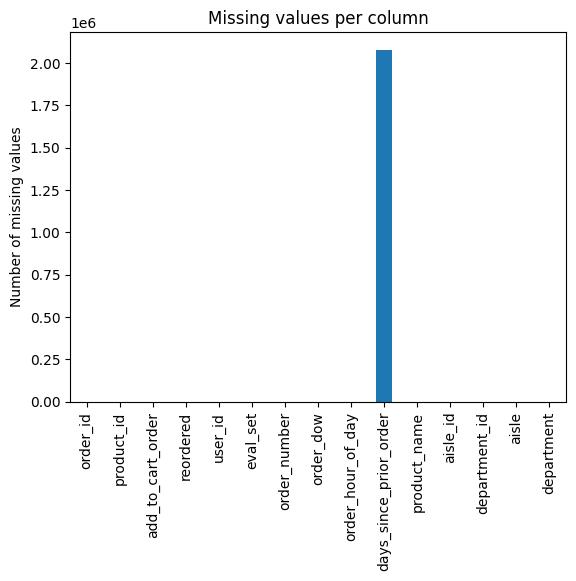

In [ ]:

import matplotlib.pyplot as plt
missing.plot(kind="bar")
plt.ylabel("Number of missing values")
plt.title("Missing values per column")
plt.show()

**Duplicates**

no duplicates in datasets

In [ ]:
prior_full.duplicated().any()

np.False_

**Numerical plots**

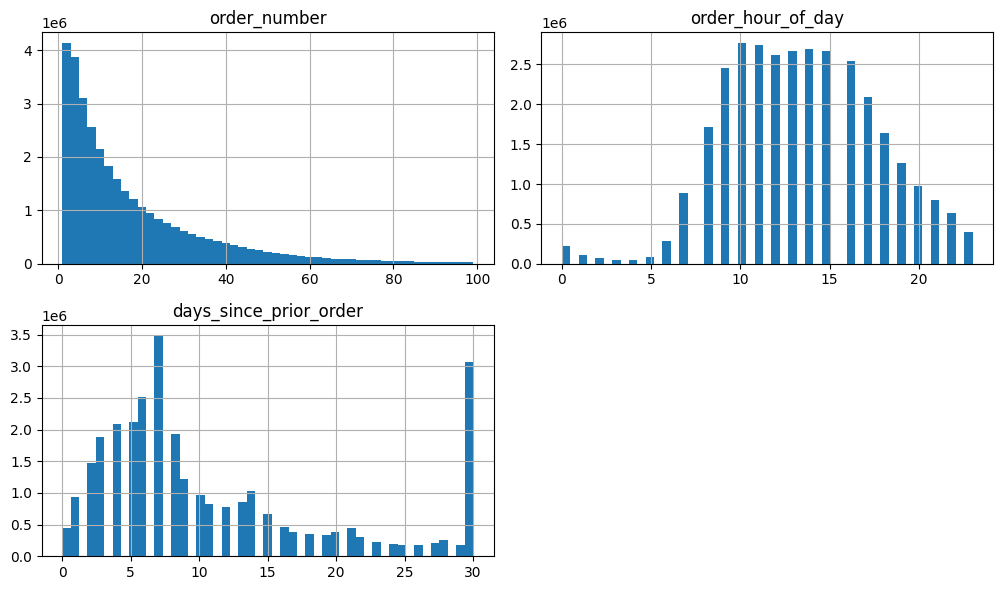

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = ["order_number", "order_hour_of_day", "days_since_prior_order"]
prior_full[numeric_columns].hist(bins=49,figsize=(10,6))
plt.tight_layout()
plt.show()


**Density**

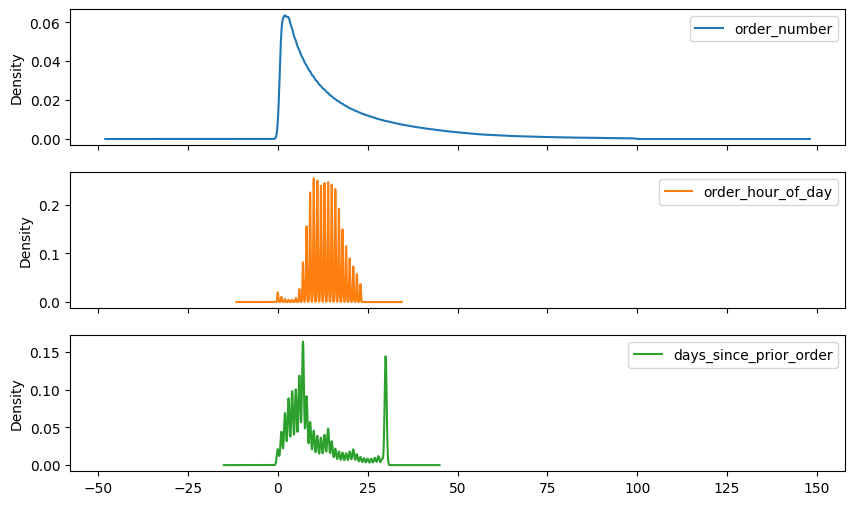

In [ ]:
prior_full[numeric_columns].plot(kind="density", subplots=True, figsize=(10,6))
plt.show()

Sample

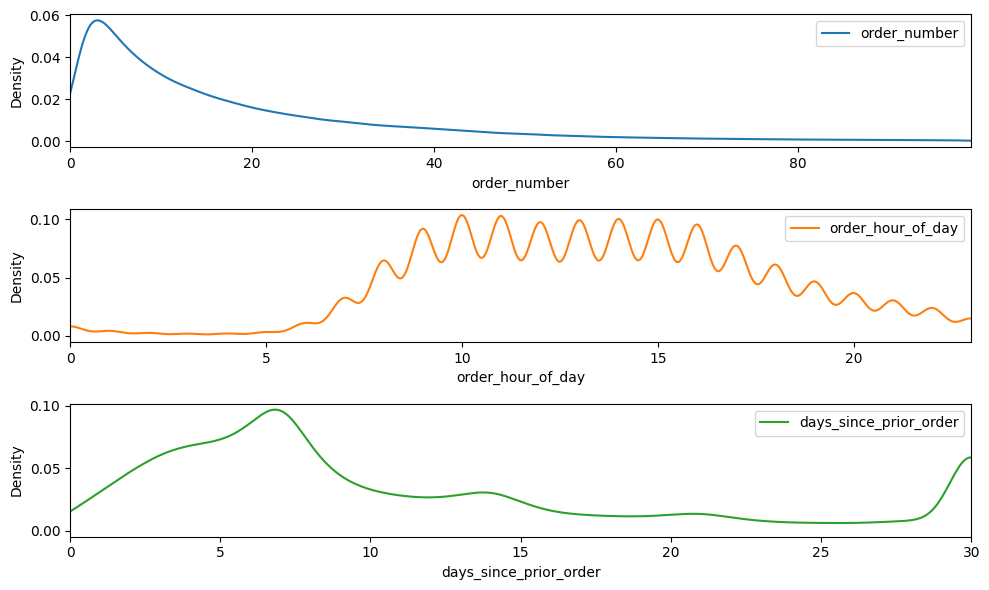

In [ ]:

sample_prior = prior_full[numeric_columns].sample(frac=0.01,random_state=42)

axes = sample_prior.plot(kind="density",subplots=True,figsize=(10,6),sharex=False)

for ax, col in zip(axes, numeric_columns):
    ax.set_xlim(0, sample_prior[col].max())
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()


**Cardinality**

Cardinality (number of unique values) per categorical column

In [ ]:
Card_columns = ["eval_set", "department", "aisle"]
cardinality = prior_full[Card_columns].nunique()
print(cardinality)

eval_set        1
department     21
aisle         134
dtype: int64


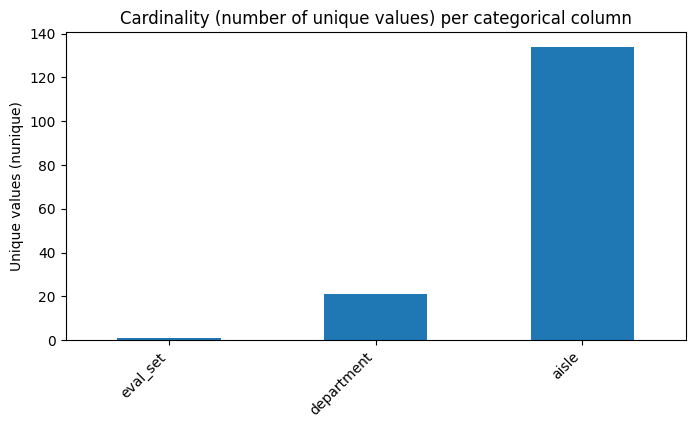

In [ ]:
plt.figure(figsize=(8,4))
cardinality.plot(kind="bar")
plt.title("Cardinality (number of unique values) per categorical column")
plt.ylabel("Unique values (nunique)")
plt.xticks(rotation=45, ha="right")
plt.show()

**Top-k Frequencies**

I found the most frequent values ​​(Top-k) and plotted them using a bar graph.

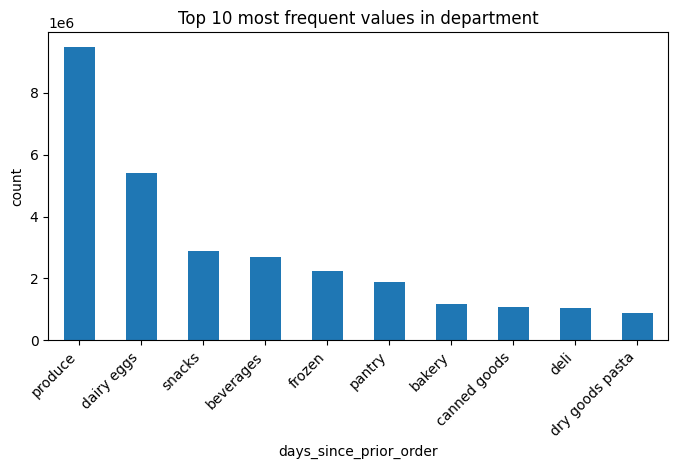

In [ ]:
departments="department"
top_department= prior_full[departments].value_counts().head(10)
plt.figure(figsize=(8,4))
top_department.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {departments}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()


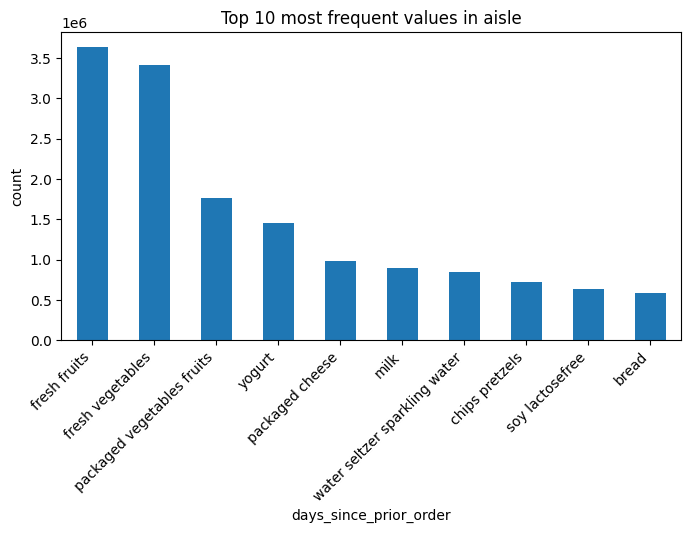

In [ ]:
aisles="aisle"
top_aisle=prior_full["aisle"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_aisle.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {aisles}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()

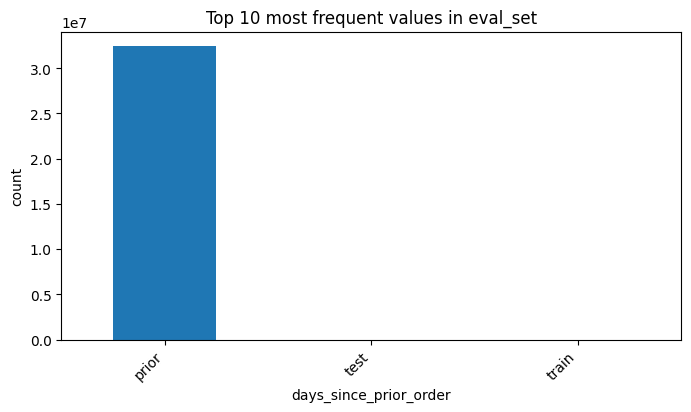

In [ ]:
eval_sets="eval_set"
top_eval_set=prior_full["eval_set"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_eval_set.plot(kind="bar")
plt.title(f"Top 10 most frequent values in {eval_sets}")
plt.ylabel("count")
plt.xlabel(col)
plt.xticks(rotation=45, ha="right")
plt.show()

**Correlation matrix, heatmap and pairwise scatter plots for selected numeric features**

In [ ]:
import numpy as np
num_cols = ["order_number","order_hour_of_day","days_since_prior_order","add_to_cart_order","reordered"]
sample_df = prior_full[num_cols].dropna()
corrilation= sample_df.corr()
print(corrilation)

                        order_number  order_hour_of_day  \
order_number                1.000000          -0.039478   
order_hour_of_day          -0.039478           1.000000   
days_since_prior_order     -0.358422           0.003878   
add_to_cart_order          -0.004921          -0.014972   
reordered                   0.250973          -0.021142   

                        days_since_prior_order  add_to_cart_order  reordered  
order_number                         -0.358422          -0.004921   0.250973  
order_hour_of_day                     0.003878          -0.014972  -0.021142  
days_since_prior_order                1.000000           0.053951  -0.132814  
add_to_cart_order                     0.053951           1.000000  -0.145232  
reordered                            -0.132814          -0.145232   1.000000  


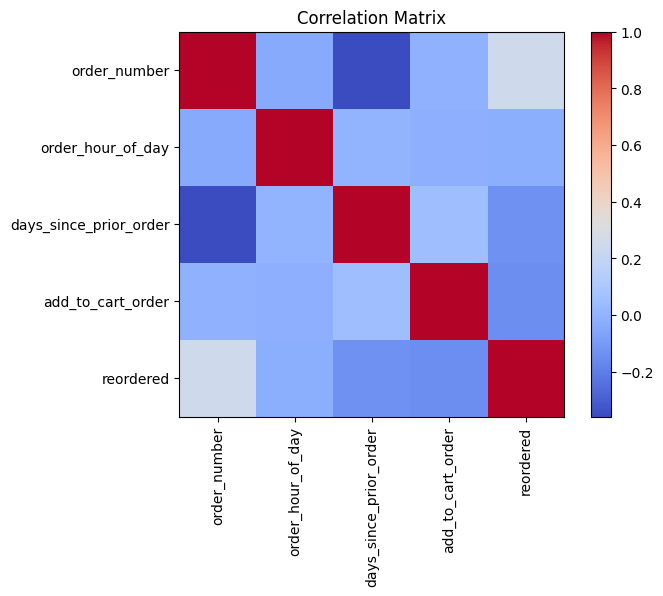

In [ ]:
plt.figure(figsize=(7,5))
corr_matrix = plt.imshow(corrilation, cmap="coolwarm")
plt.colorbar(corr_matrix)
plt.xticks(range(len(corrilation.columns)), corrilation.columns, rotation=90)
plt.yticks(range(len(corrilation.columns)), corrilation.columns)
plt.title("Correlation Matrix")
plt.show()

Here, I'll establish a relationship between just three columns (order_number ,days_since_prior_order ,add_to_cart_order ) to answer these questions:

*Do users with a high order number place orders in fewer days?

→ order_number vs days_since_prior_order

*Does the order in which products are added to the cart affect purchasing behavior?

→ add_to_cart_order vs order_number

*Are products added first more likely to be reordered?



---

**1)** Why does the output look like this?

`days_since_prior_order` has a fixed, discrete value (0 to 30 days only).

While `order_number` increments gradually (1 → 100+).

Each `days` value (e.g., 7 days) is repeated thousands of times \with different order numbers.
There is no clear linear relationship.
Each constant value in days_since_prior_order draws a horizontal line.

Therefore, the shape is now composed of horizontal layers.
This is a recurring time-based behavior (weekly/bi-weekly).

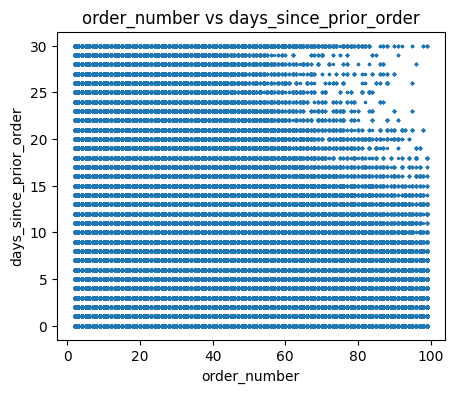

In [ ]:
col1 = "order_number"
col2 = "days_since_prior_order"
col3 = "add_to_cart_order"

corr_3_columns = prior_full[[col1, col2, col3]].dropna()
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col1], corr_3_columns[col2], s=2)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f"{col1} vs {col2}")
plt.show()



---


**2)** We observe here that the dispersion decreases as the order_number increases.
User behavior becomes more stable over time. Because over time:
Users know what they want,
Requests decrease,
Addition order decreases.

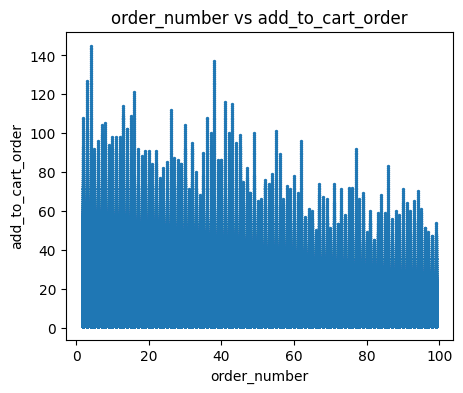

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col1], corr_3_columns[col3], s=2)
plt.xlabel(col1)
plt.ylabel(col3)
plt.title(f"{col1} vs {col3}")
plt.show()



---


**3)** Here, both variables are discrete.
The diagram appears as vertical columns.

This means there isn't a strong, direct relationship, because the waiting time between orders doesn't determine the size or arrangement of the basket.


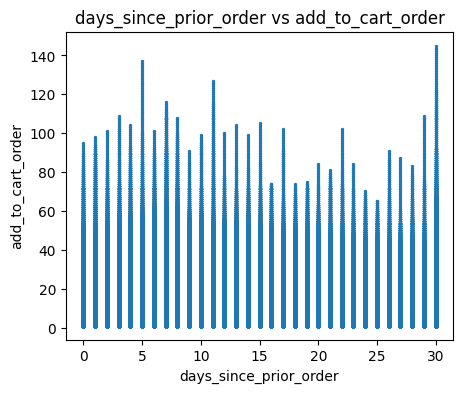

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(corr_3_columns[col2], sample_df[col3], s=2)
plt.xlabel(col2)
plt.ylabel(col3)
plt.title(f"{col2} vs {col3}")
plt.show()

**Time-of-day**

Here I will find the order distribution by hour

In [ ]:
hour_counts = prior_full["order_hour_of_day"].value_counts().sort_index()

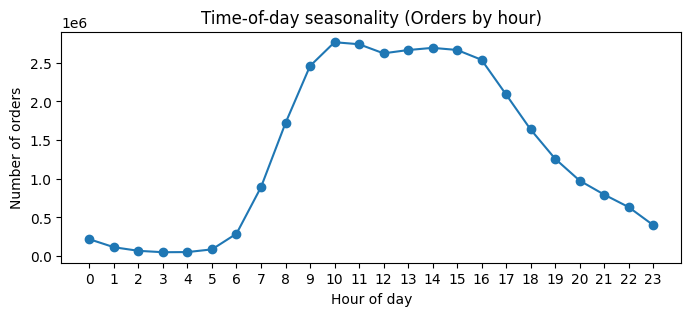

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(hour_counts.index, hour_counts.values, marker="o")
plt.xticks(range(0,24))
plt.title("Time-of-day seasonality (Orders by hour)")
plt.xlabel("Hour of day")
plt.ylabel("Number of orders")
plt.show()

**Day-of-week**

Here I will find the distribution of orders by day

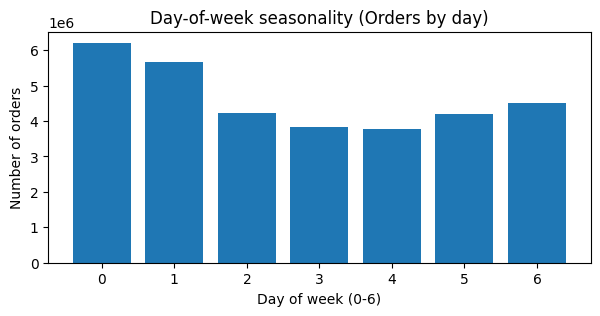

In [ ]:
dow_counts = prior_full["order_dow"].value_counts().sort_index()
plt.figure(figsize=(7,3))
plt.bar(dow_counts.index, dow_counts.values)
plt.title("Day-of-week seasonality (Orders by day)")
plt.xlabel("Day of week (0-6)")
plt.ylabel("Number of orders")
plt.show()

**Monthly seasonality**

There is no actual date in the data, so we make an “approximate” month using days_since_prior_order (cumulative for each user) and then divide by 30.

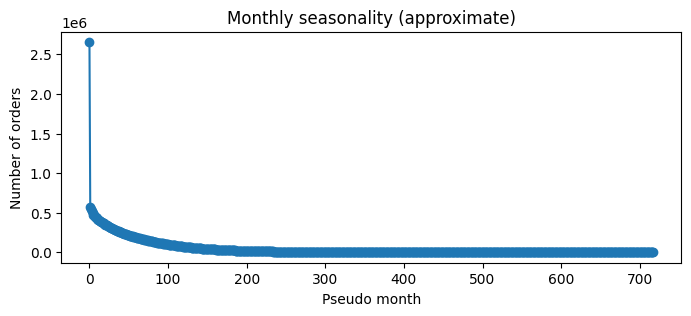

In [ ]:
tmp = prior_full[["user_id", "order_number", "days_since_prior_order"]]
tmp = tmp.sort_values(["user_id", "order_number"])
tmp["days_since_prior_order"] = tmp["days_since_prior_order"].fillna(0)
tmp["days_from_first_order"] = (
    tmp.groupby("user_id")["days_since_prior_order"].cumsum()
)
tmp["pseudo_month"] = (tmp["days_from_first_order"] // 30).astype(int)
month_counts = tmp["pseudo_month"].value_counts().sort_index()
plt.figure(figsize=(8,3))
plt.plot(month_counts.index, month_counts.values, marker="o")
plt.xlabel("Pseudo month")
plt.ylabel("Number of orders")
plt.title("Monthly seasonality (approximate)")
plt.show()

#Feature Engineering

##user features

In [ ]:
prior_full_copy = prior_full.copy()

In [ ]:
###our unique idietifer for these features will be user_id
###total order:The total number of orders placed by each user
user_features = pd.DataFrame({'user_id': prior_full_copy['user_id'].unique()})
user_total = prior_full_copy.groupby('user_id')['order_number'].max().reset_index(name='user_total_orders')

###basket_size_per_order:This feature is used to measure the average basket size for each user, meaning the average number of products a user adds to an order.
basket = prior_full_copy.groupby(['user_id','order_id'])['product_id'].count().reset_index(name='basket_size')
user_avg_basket = basket.groupby('user_id')['basket_size'].mean().reset_index(name='user_average_basket')

###reorder ratio:This feature represents whether a user tends to buy new products or reorder the same products more often.
user_reorder = prior_full_copy.groupby('user_id')['reordered'].mean().reset_index(name='user_reorder_ratio')

###Mean Days Between Orders: This feature represents how many days typically pass between orders for the same user, showing whether the user is a daily, weekly, monthly, or less frequent buyer.
user_days = prior_full_copy.groupby('user_id')['days_since_prior_order'].mean().reset_index(name='user_mean_days_between_order')

### Last Inter-Order Gap: Days between the user’s two most recent prior orders.
user_last_interorder_gap = prior_full_copy.sort_values(['user_id','order_number']).groupby("user_id")["days_since_prior_order"].last().reset_index(name="user_last_interorder_gap")

###merging to user_features
user_features = (user_features
                 .merge(user_total, on='user_id', how='left')
                 .merge(user_avg_basket, on='user_id', how='left')
                 .merge(user_reorder, on='user_id', how='left')
                 .merge(user_days, on='user_id', how='left')
                 .merge(user_last_interorder_gap, on='user_id', how='left'))


In [ ]:
### checking everything is working fine
assert user_features['user_id'].is_unique
user_features.isna().sum().head()

,0
user_id,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0


In [ ]:

user_features.head()

,user_id,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap
0,202279,8,11.250000,0.477778,21.862499,30.0
1,205970,25,12.920000,0.588235,9.805825,7.0
2,178520,56,16.482143,0.884074,6.740659,7.0
3,156122,52,18.596154,0.840745,6.966351,7.0
4,22352,8,11.375000,0.087912,23.670454,30.0


In [ ]:
user_features.shape

(206209, 6)

##product features

In [ ]:
###our unique idietifer for these features will be product_id
product_features = pd.DataFrame({'product_id': prior_full_copy['product_id'].unique()})

######Total Purchases: Number of times the product appears in prior (purchase count).
product_total_purchase = prior_full_copy.groupby('product_id')['order_id'].count().reset_index(name='product_total_purchase')

###Overall Reorder Rate:The proportion of times a product is reordered among all its purchases, indicating how often customers repurchase the product.
product_reorder = prior_full_copy.groupby('product_id')['reordered'].mean().reset_index(name='product_reorder_ratio')

###Average Position in Cart:The average add-to-cart position of a product across orders, reflecting how early or late the product is typically added to the cart.
product_avg_cart_pos = prior_full_copy.groupby('product_id')['add_to_cart_order'].mean().reset_index(name='product_avg_cart_pos')

###Popularity Over Time:A measure of how frequently a product is purchased across different time periods, capturing trends in demand over time.
product_pop_overtime = prior_full_copy.groupby('product_id')['order_number'].mean().reset_index(name='product_pop_overtime')

###merging to product_features
product_features = (product_features
                 .merge(product_total_purchase, on='product_id', how='left')
                 .merge(product_reorder, on='product_id', how='left')
                 .merge(product_avg_cart_pos, on='product_id', how='left')
                 .merge(product_pop_overtime, on='product_id', how='left'))

In [ ]:
### checking everything is working fine
assert product_features['product_id'].is_unique
product_features.isna().sum().head()

,0
product_id,0
product_total_purchase,0
product_reorder_ratio,0
product_avg_cart_pos,0
product_pop_overtime,0


In [ ]:
product_features.head()

,product_id,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime
0,33120,19400,0.708454,6.816959,18.204227
1,28985,67449,0.694465,7.501683,15.959421
2,9327,6299,0.157962,9.943166,14.909351
3,45918,744,0.272849,8.444892,17.795699
4,30035,569,0.507909,8.481547,19.773286


In [ ]:
product_features.shape

(49677, 5)

##UserxProduct features

In [ ]:
###our unique idietifer for these features will be (user_id,product_id)
userxproduct_features = prior_full_copy[["user_id" , "product_id"]].drop_duplicates()

###prior purchase count:How many times a user bought a specific product before.
prior_purchase_count_uxp = prior_full_copy.groupby(["user_id" , "product_id"]).size().reset_index(name="prior_purchase_count_uxp")

###days since last purchase by that user:
tmp = prior_full_copy[['order_id', 'user_id', 'order_number', 'days_since_prior_order',"product_id"]]   # <-- removed .copy()

tmp2 = tmp[["user_id","order_number","days_since_prior_order","order_id"]].drop_duplicates(["user_id","order_id"]).copy()
tmp2["days_since_prior_order"] = tmp2["days_since_prior_order"].fillna(0)
tmp2["cum_col"] = tmp2.sort_values(["user_id","order_number"], kind="mergesort").groupby("user_id")['days_since_prior_order'].cumsum()

# only keep the minimal columns needed for next groupby (huge RAM save)
tmp_min = tmp[["user_id","product_id","order_id"]].copy()
tmp_min = tmp_min.merge(tmp2[["order_id","cum_col"]], on="order_id", how="left")

p_l_p = tmp_min.groupby(["user_id","product_id"])["cum_col"].max().reset_index(name="p_l_p")
u_l_p = tmp2.groupby("user_id")["cum_col"].max().reset_index(name="u_l_p")
l_p = p_l_p.merge(u_l_p, on="user_id", how="left")
l_p["days_since_last"] = l_p['u_l_p'] - l_p['p_l_p']

###average reorder probability for user-product
reorder_prob_userxprod = prior_full_copy.groupby(["user_id", "product_id"])["reordered"].mean().reset_index(name="reorder_prob_userxprod")

###merging to userxproduct_features
userxproduct_features = (userxproduct_features
                 .merge(prior_purchase_count_uxp, on=["user_id" , "product_id"], how='left')
                 .merge(l_p[["user_id", "product_id","days_since_last"]], on=["user_id" , "product_id"], how='left')
                 .merge(reorder_prob_userxprod , on=["user_id" , "product_id"], how='left'))


In [ ]:
import gc

del tmp, tmp2, tmp_min, p_l_p, u_l_p, l_p, prior_purchase_count_uxp, reorder_prob_userxprod,prior_full_copy
gc.collect()

27277

In [ ]:
userxproduct_features.sort_values("user_id").head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod
11081338,1,14084,1,176.0,0.000000
3105783,1,10258,9,0.0,0.888889
11111602,1,35951,1,0.0,0.000000
10394404,1,46149,3,0.0,0.666667
10394403,1,49235,2,30.0,0.500000


In [ ]:
userxproduct_features.shape

(13307953, 5)

In [ ]:
userxproduct_features.duplicated().any()

np.False_

In [ ]:
features =( userxproduct_features
                            .merge(user_features, on="user_id", how="left")
                            .merge(product_features, on="product_id", how="left"))

In [ ]:
features.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286


In [ ]:
features.shape

(13307953, 14)

In [ ]:
features.isna().value_counts()

,,,,,,,,,,,,,,count
user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,13307953


In [ ]:
features.duplicated().any()

np.False_

In [ ]:
features.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286


#Classification Task

In [ ]:
user_product_train = datasets['order_products__train'].merge(datasets["orders"], on="order_id", how="left")

In [ ]:
user_product_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [ ]:
train_pairs = user_product_train[["user_id","product_id"]].drop_duplicates()

In [ ]:
train_pairs.head()

,user_id,product_id
0,112108,49302
1,112108,11109
2,112108,10246
3,112108,49683
4,112108,43633


In [ ]:
train_pairs.shape

(1384617, 2)

In [ ]:
train_pairs["reorder"] = 1

In [ ]:
train_pairs.head()

,user_id,product_id,reorder
0,112108,49302,1
1,112108,11109,1
2,112108,10246,1
3,112108,49683,1
4,112108,43633,1


In [ ]:
cla_df = features.merge(train_pairs, on=["user_id", "product_id"], how="left")

In [ ]:
cla_df.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227,1.0
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421,NaN
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351,NaN
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699,NaN
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286,NaN


In [ ]:
cla_df.isna().sum()

,0
user_id,0
product_id,0
prior_purchase_count_uxp,0
days_since_last,0
reorder_prob_userxprod,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0
user_last_interorder_gap,0


In [ ]:
prior_pairs = features[["user_id","product_id"]].drop_duplicates()
train_pairs = user_product_train[["user_id","product_id"]].drop_duplicates()

overlap = prior_pairs.merge(train_pairs, on=["user_id","product_id"], how="inner")

print("prior pairs:", len(prior_pairs))
print("train pairs:", len(train_pairs))
print("overlap:", len(overlap))
print("overlap rate vs prior:", len(overlap)/len(prior_pairs))
print("overlap rate vs train:", len(overlap)/len(train_pairs))


prior pairs: 13307953
train pairs: 1384617
overlap: 828824
overlap rate vs prior: 0.062280352207435656
overlap rate vs train: 0.5985944127509629


In [ ]:
cla_df["reorder"] = cla_df["reorder"].fillna(0).astype("int8")

In [ ]:
cla_df.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227,1
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421,0
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351,0
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699,0
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286,0


In [ ]:
cla_df.isna().sum()

,0
user_id,0
product_id,0
prior_purchase_count_uxp,0
days_since_last,0
reorder_prob_userxprod,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0
user_last_interorder_gap,0


the label is imblanced, 12 million  product x user does not appear in train and only 800k appreared

In [ ]:
cla_df["reorder"].value_counts()

,count
reorder,
0,12479129
1,828824


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
project_dir = "/content/drive/MyDrive/instacart_project"
data_dir = f"{project_dir}/classification_data"

os.makedirs(data_dir, exist_ok=True)


project_dir = "/content/drive/MyDrive/instacart_project"
save_path = f"{project_dir}/classification_data/cla_df.parquet"

cla_df.to_parquet(save_path, compression="snappy")
print("Saved:", save_path)


NameError: name 'cla_df' is not defined

In [3]:
import pandas as pd

cla_df = pd.read_parquet(
    "/content/drive/MyDrive/instacart_project/classification_data/cla_df.parquet"
)

In [4]:
cla_df.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227,1
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421,0
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351,0
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699,0
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286,0


##Eda for classification df

In [5]:
cla_df.shape

(13307953, 15)

In [6]:
cla_df.columns

Index(['user_id', 'product_id', 'prior_purchase_count_uxp', 'days_since_last',
       'reorder_prob_userxprod', 'user_total_orders', 'user_average_basket',
       'user_reorder_ratio', 'user_mean_days_between_order',
       'user_last_interorder_gap', 'product_total_purchase',
       'product_reorder_ratio', 'product_avg_cart_pos', 'product_pop_overtime',
       'reorder'],
      dtype='object')

In [7]:
cla_df.head()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
0,202279,33120,5,0.0,0.800000,8,11.25,0.477778,21.862499,30.0,19400,0.708454,6.816959,18.204227,1
1,202279,28985,5,54.0,0.800000,8,11.25,0.477778,21.862499,30.0,67449,0.694465,7.501683,15.959421,0
2,202279,9327,1,123.0,0.000000,8,11.25,0.477778,21.862499,30.0,6299,0.157962,9.943166,14.909351,0
3,202279,45918,5,30.0,0.800000,8,11.25,0.477778,21.862499,30.0,744,0.272849,8.444892,17.795699,0
4,202279,30035,3,30.0,0.666667,8,11.25,0.477778,21.862499,30.0,569,0.507909,8.481547,19.773286,0


In [8]:
cla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   user_id                       int32  
 1   product_id                    int32  
 2   prior_purchase_count_uxp      int64  
 3   days_since_last               float32
 4   reorder_prob_userxprod        float64
 5   user_total_orders             int16  
 6   user_average_basket           float64
 7   user_reorder_ratio            float64
 8   user_mean_days_between_order  float32
 9   user_last_interorder_gap      float32
 10  product_total_purchase        int64  
 11  product_reorder_ratio         float64
 12  product_avg_cart_pos          float64
 13  product_pop_overtime          float64
 14  reorder                       int8   
dtypes: float32(3), float64(6), int16(1), int32(2), int64(2), int8(1)
memory usage: 1.1 GB


In [9]:
cla_df.describe()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
count,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07,1.330795e+07
mean,1.029987e+05,2.551351e+04,2.437226e+00,8.358693e+01,2.655049e-01,2.538019e+01,1.270054e+01,5.015150e-01,1.300562e+01,1.359757e+01,2.249905e+04,5.345431e-01,8.724357e+00,1.674494e+01,6.228035e-02
std,5.943677e+04,1.422429e+04,3.554528e+00,8.576776e+01,3.397437e-01,2.228080e+01,6.299273e+00,1.976680e-01,6.465785e+00,9.732783e+00,5.587238e+04,1.624641e-01,1.564856e+00,3.046185e+00,2.416641e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.157900e+04,1.329200e+04,1.000000e+00,1.400000e+01,0.000000e+00,9.000000e+00,8.250000e+00,3.577982e-01,7.812000e+00,6.000000e+00,1.050000e+03,4.418605e-01,7.935209e+00,1.487410e+01,0.000000e+00
50%,1.027130e+05,2.564000e+04,1.000000e+00,5.500000e+01,0.000000e+00,1.800000e+01,1.153333e+01,5.182927e-01,1.176596e+01,1.000000e+01,4.306000e+03,5.596828e-01,8.932644e+00,1.704965e+01,0.000000e+00
75%,1.544500e+05,3.815700e+04,2.000000e+00,1.300000e+02,5.000000e-01,3.500000e+01,1.592857e+01,6.576200e-01,1.725000e+01,2.200000e+01,1.643900e+04,6.518007e-01,9.751692e+00,1.860433e+01,0.000000e+00
max,2.062090e+05,4.968800e+04,9.900000e+01,3.650000e+02,9.898990e-01,9.900000e+01,7.025000e+01,9.895288e-01,3.000000e+01,3.000000e+01,4.725650e+05,9.411765e-01,5.300000e+01,6.380000e+01,1.000000e+00


In [10]:
cla_df.isna().sum()

,0
user_id,0
product_id,0
prior_purchase_count_uxp,0
days_since_last,0
reorder_prob_userxprod,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0
user_last_interorder_gap,0


In [11]:
cla_df.duplicated().sum()

np.int64(0)

no more EDA until i split my data

###split my data

We performed a group split by user_id so that each user appears in only one set. To maintain label balance, we stratified users using a user-level summary label and verified that both row-level and user-level reorder rates match across train and test

In [12]:
user_label = cla_df.groupby("user_id")["reorder"].max().astype(int)

In [15]:
user_label.head()

,reorder
user_id,
1,1
2,1
3,0
4,0
5,1


In [13]:
user_label.value_counts()

,count
reorder,
1,122607
0,83602


In [18]:
from sklearn.model_selection import train_test_split

users = user_label.index.to_numpy()
y_user = user_label.to_numpy()

train_users, test_users = train_test_split(
    users,
    test_size=0.2,
    random_state=42,
    stratify=y_user
)


In [19]:
cl_train_df = cla_df[cla_df["user_id"].isin(train_users)].copy()
cl_test_df  =cla_df[cla_df["user_id"].isin(test_users)].copy()


In [20]:
# 1) No overlap in users
assert set(cl_train_df["user_id"]).isdisjoint(set(cl_test_df["user_id"]))

# 2) Distribution check (row-level)
print("Row reorder rate - train:", cl_train_df["reorder"].mean())
print("Row reorder rate - test :", cl_test_df["reorder"].mean())

# 3) Distribution check (user-level)
print("User reorder rate - train:", user_label.loc[train_users].mean())
print("User reorder rate - test :", user_label.loc[test_users].mean())


Row reorder rate - train: 0.06228055421132008
Row reorder rate - test : 0.062279545787892056
User reorder rate - train: 0.5945734601465748
User reorder rate - test : 0.594588041317104


In [ ]:
cl_train_df.to_parquet("/content/drive/MyDrive/instacart_project/classification_data/cl_train_df.parquet")
cl_test_df.to_parquet("/content/drive/MyDrive/instacart_project/classification_data/cl_test_df.parquet")


###back to EDA

In [ ]:
import pandas as pd

cl_train_df = pd.read_parquet(
    "/content/drive/MyDrive/instacart_project/classification_data/cl_train_df.parquet"
)

In [21]:
cl_train_df.shape

(10642150, 15)

In [32]:
cl_train_df["reorder"].value_counts()

,count
reorder,
0,9979351
1,662799


In [22]:
cl_train_df.corr()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
user_id,1.000000,-0.000309,-0.001349,-0.001294,-0.001583,-0.006805,0.000620,-0.004796,0.004427,0.004284,-0.000379,-0.000982,-0.001156,-0.003867,-0.000239
product_id,-0.000309,1.000000,0.002952,-0.003670,0.008373,-0.002671,0.004069,-0.002047,0.001395,0.001237,0.034790,0.025288,0.002867,0.000297,0.002082
prior_purchase_count_uxp,-0.001349,0.002952,1.000000,-0.193002,0.655283,0.235513,0.053277,0.306107,-0.171425,-0.114707,0.163946,0.233017,-0.163577,0.089599,0.193079
days_since_last,-0.001294,-0.003670,-0.193002,1.000000,-0.231026,0.317746,-0.032857,0.268547,-0.154841,-0.057170,-0.090236,-0.108644,0.087725,-0.058053,-0.172738
reorder_prob_userxprod,-0.001583,0.008373,0.655283,-0.231026,1.000000,0.188838,0.071529,0.329999,-0.153980,-0.101710,0.165960,0.287110,-0.165300,0.089396,0.193437
user_total_orders,-0.006805,-0.002671,0.235513,0.317746,0.188838,1.000000,-0.081311,0.668485,-0.666528,-0.450414,-0.033664,-0.033060,0.065152,0.115327,-0.072905
user_average_basket,0.000620,0.004069,0.053277,-0.032857,0.071529,-0.081311,1.000000,0.162771,0.085356,0.043209,-0.023108,-0.018992,0.163351,0.010455,0.037853
user_reorder_ratio,-0.004796,-0.002047,0.306107,0.268547,0.329999,0.668485,0.162771,1.000000,-0.544078,-0.354527,-0.001220,0.037292,0.029503,0.132977,0.004730
user_mean_days_between_order,0.004427,0.001395,-0.171425,-0.154841,-0.153980,-0.666528,0.085356,-0.544078,1.000000,0.622951,0.028207,0.034392,-0.065470,-0.094582,0.055373
user_last_interorder_gap,0.004284,0.001237,-0.114707,-0.057170,-0.101710,-0.450414,0.043209,-0.354527,0.622951,1.000000,0.016489,0.019286,-0.045066,-0.081978,0.028841


In [23]:
cl_train_df.corr()["reorder"]

,reorder
user_id,-0.000239
product_id,0.002082
prior_purchase_count_uxp,0.193079
days_since_last,-0.172738
reorder_prob_userxprod,0.193437
user_total_orders,-0.072905
user_average_basket,0.037853
user_reorder_ratio,0.004730
user_mean_days_between_order,0.055373
user_last_interorder_gap,0.028841


skip both cells

In [25]:
# Separate classes
df_pos = cl_train_df[cl_train_df["reorder"] == 1]
df_neg = cl_train_df[cl_train_df["reorder"] == 0]

# Undersample majority class
df_neg_down = df_neg.sample(
    n=len(df_pos),
    random_state=42
)

# Combine
train_df_balanced = pd.concat([df_pos, df_neg_down])

# Shuffle
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42)

# Check
train_df_balanced["reorder"].value_counts(normalize=True)


,proportion
reorder,
0,0.5
1,0.5


In [26]:
train_df_balanced.corr()

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
user_id,1.000000,-0.001570,-0.003548,-0.000257,-0.002867,-0.005830,0.000061,-0.007625,0.003236,0.004127,-0.000105,-0.001492,-0.000483,-0.004809,-0.000807
product_id,-0.001570,1.000000,-0.002216,-0.002107,0.004918,-0.002566,0.008684,-0.002797,0.000656,0.001623,0.017092,0.017673,0.019096,-0.004225,0.004298
prior_purchase_count_uxp,-0.003548,-0.002216,1.000000,-0.237283,0.628467,0.315645,0.062058,0.396434,-0.220649,-0.153640,0.172471,0.268544,-0.206202,0.113683,0.261844
days_since_last,-0.000257,-0.002107,-0.237283,1.000000,-0.332753,0.287363,-0.055673,0.165347,-0.126181,-0.034515,-0.116801,-0.209124,0.154985,-0.082610,-0.405545
reorder_prob_userxprod,-0.002867,0.004918,0.628467,-0.332753,1.000000,0.182392,0.090714,0.391011,-0.156006,-0.112010,0.179036,0.340416,-0.222650,0.114542,0.366599
user_total_orders,-0.005830,-0.002566,0.315645,0.287363,0.182392,1.000000,-0.073031,0.653901,-0.632497,-0.430116,-0.032619,-0.051447,0.076951,0.111610,-0.163885
user_average_basket,0.000061,0.008684,0.062058,-0.055673,0.090714,-0.073031,1.000000,0.149452,0.067295,0.033976,-0.014041,-0.010972,0.167584,0.012731,0.074030
user_reorder_ratio,-0.007625,-0.002797,0.396434,0.165347,0.391011,0.653901,0.149452,1.000000,-0.508690,-0.333576,0.002242,0.046033,0.015954,0.133697,0.007697
user_mean_days_between_order,0.003236,0.000656,-0.220649,-0.126181,-0.156006,-0.632497,0.067295,-0.508690,1.000000,0.637324,0.024605,0.040569,-0.072199,-0.089189,0.113591
user_last_interorder_gap,0.004127,0.001623,-0.153640,-0.034515,-0.112010,-0.430116,0.033976,-0.333576,0.637324,1.000000,0.013678,0.018387,-0.045250,-0.077542,0.060046


In [31]:
train_df_balanced.to_parquet("/content/drive/MyDrive/instacart_project/classification_data/cl_train_df_balanced.parquet")

In [42]:
from sklearn.model_selection import train_test_split

eda_df, _ = train_test_split(cl_train_df, train_size=0.03, stratify=cl_train_df["reorder"], random_state=42)

In [44]:
cl_train_df["reorder"].value_counts(normalize=True), \
eda_df["reorder"].value_counts(normalize=True)


(reorder
 0    0.937719
 1    0.062281
 Name: proportion, dtype: float64,
 reorder
 0    0.937719
 1    0.062281
 Name: proportion, dtype: float64)

In [57]:
eda_df

,user_id,product_id,prior_purchase_count_uxp,days_since_last,reorder_prob_userxprod,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap,product_total_purchase,product_reorder_ratio,product_avg_cart_pos,product_pop_overtime,reorder
5285684,34928,47788,2,207.0,0.500000,12,6.166667,0.567568,21.430769,9.0,8291,0.578097,8.782415,19.594741,0
11844201,118004,421,1,44.0,0.000000,4,9.500000,0.157895,21.678572,30.0,528,0.346591,10.123106,16.361742,0
12051587,168020,48006,1,49.0,0.000000,10,11.000000,0.490909,6.850000,8.0,100,0.390000,12.010000,13.510000,0
1824649,118084,5259,1,0.0,0.000000,3,10.333333,0.032258,30.000000,30.0,994,0.428571,9.060362,12.536217,0
3247943,29089,12000,7,118.0,0.857143,54,22.074074,0.847315,5.953072,5.0,1166,0.595197,10.908233,22.424528,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959599,8228,47209,6,28.0,0.833333,26,13.384615,0.586207,12.753709,18.0,213584,0.796553,6.775011,19.420443,0
8053480,131859,38293,2,30.0,0.500000,4,9.750000,0.282051,29.608696,30.0,26721,0.642903,8.925639,16.733131,0
11594218,166968,45345,1,176.0,0.000000,38,11.026316,0.711217,10.174757,17.0,649,0.329738,10.466872,16.959938,0
1863285,2877,4421,1,215.0,0.000000,13,17.923077,0.510730,20.683035,30.0,12230,0.547915,9.776043,16.322731,0


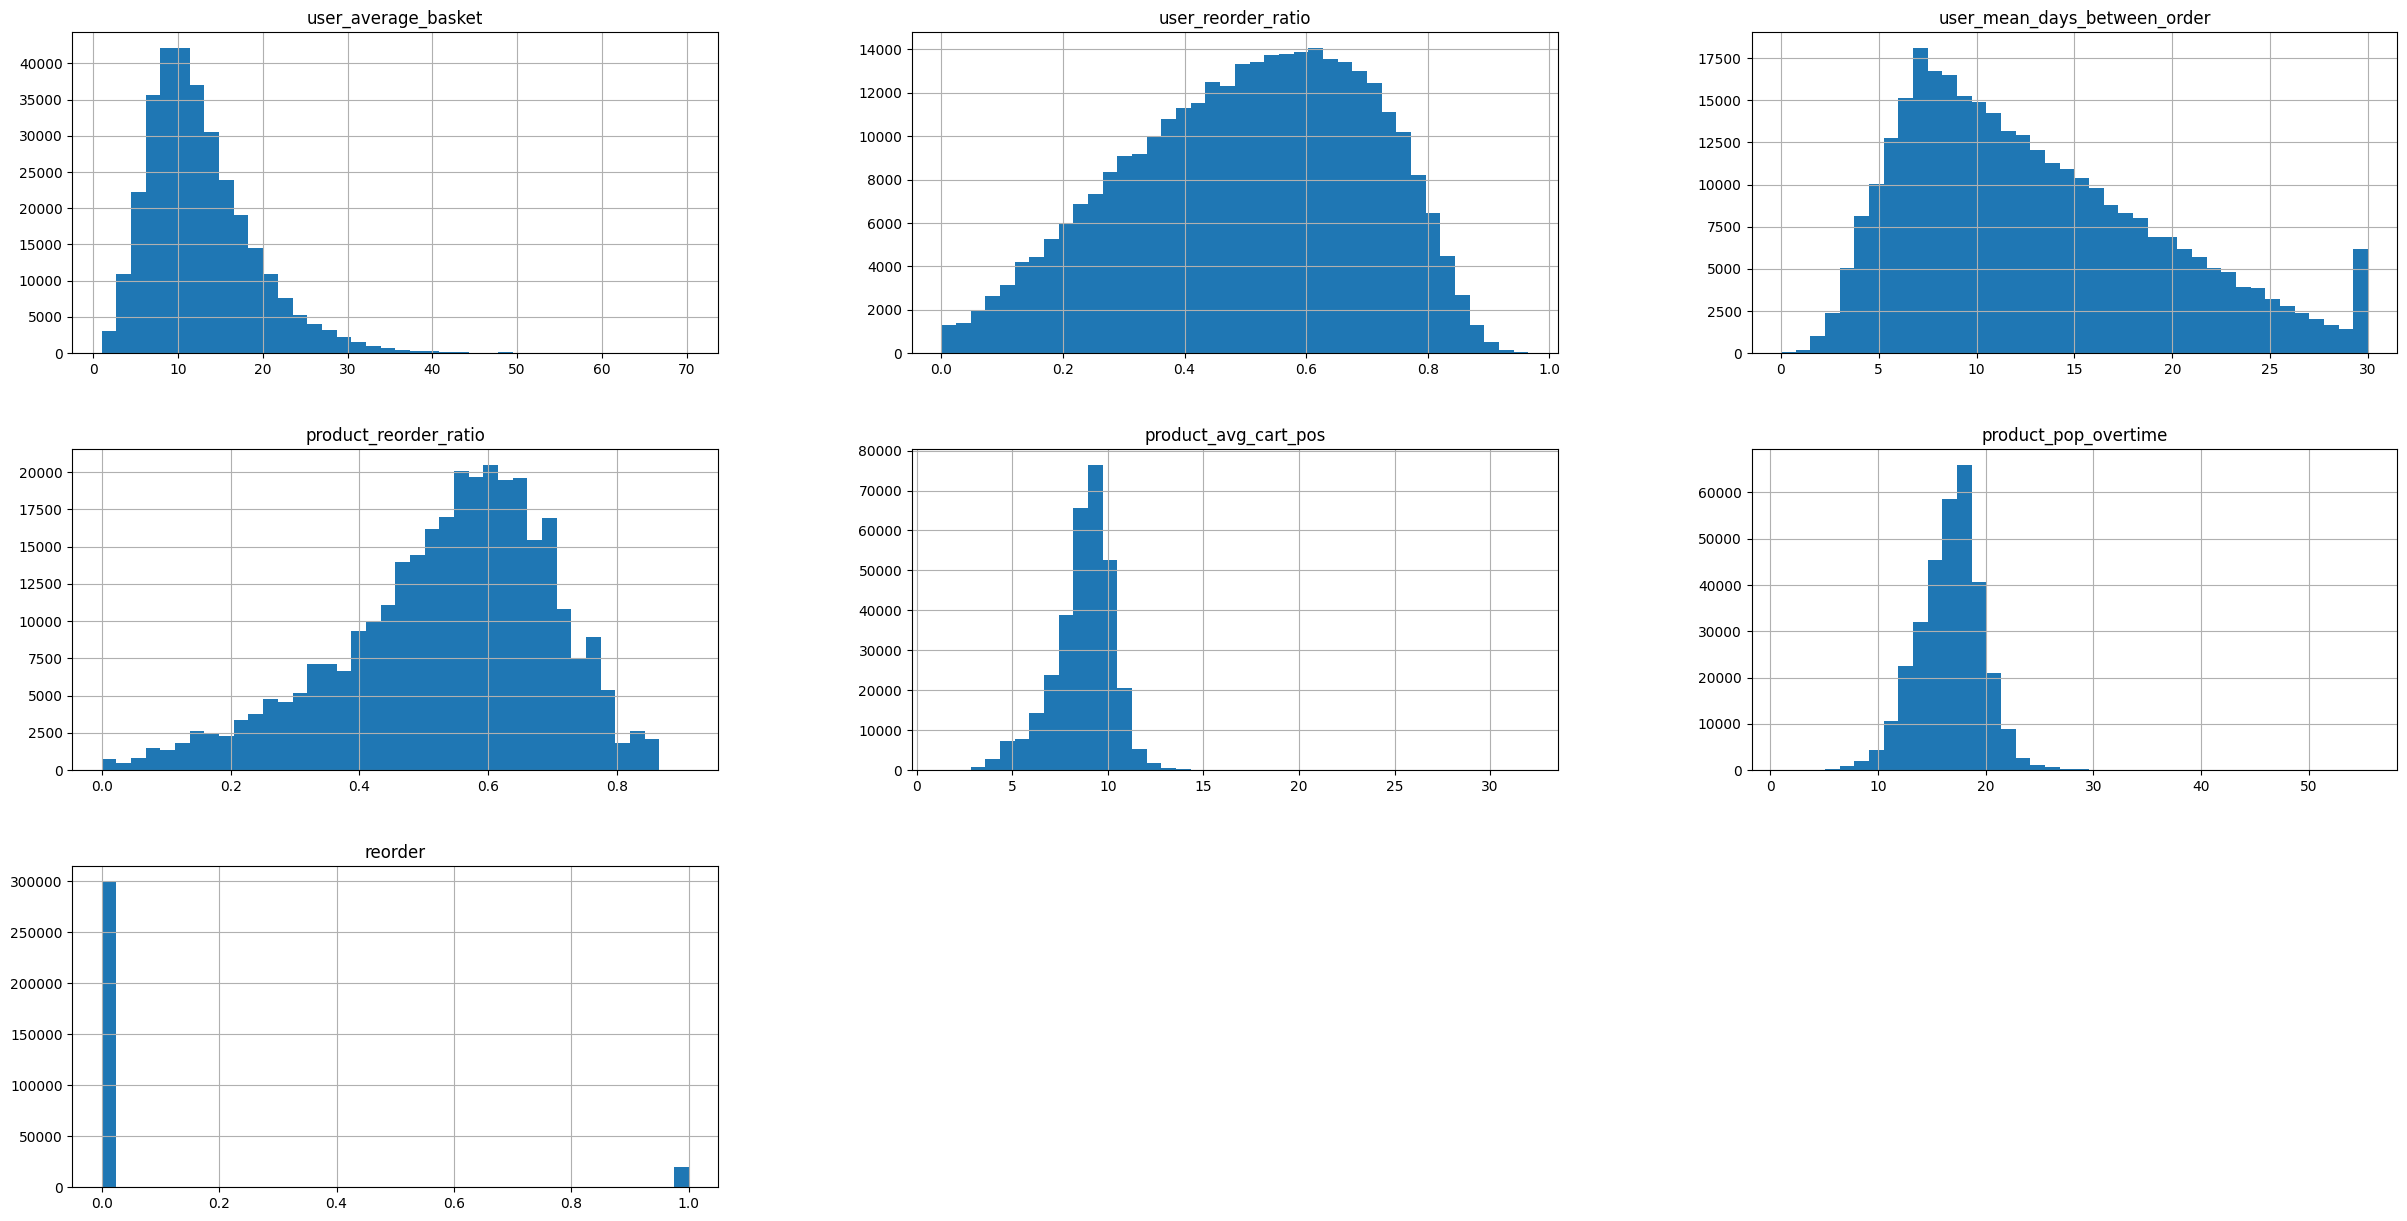

In [56]:

import matplotlib.pyplot as plt
num_columns = eda_df.iloc[:,[6,7,8,11,12,13,14]]
num_columns.hist(bins=40, figsize=(30,15))
plt.show()

Text(0.5, 1.0, 'prior_purchase_count_uxp')

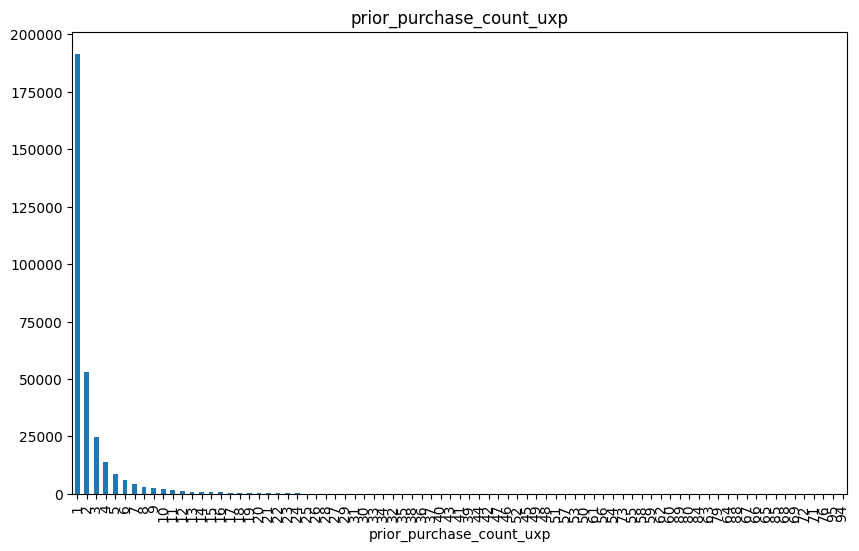

In [59]:

ax = eda_df['prior_purchase_count_uxp'].value_counts().plot.bar(figsize=(10,6))
ax.set_title("prior_purchase_count_uxp")

Text(0.5, 1.0, 'prior_purchase_count_uxp for only reorder')

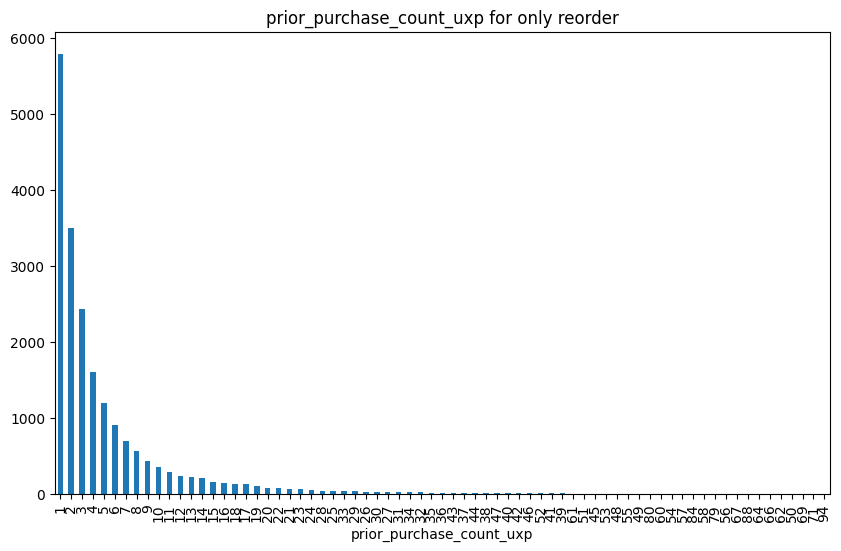

In [68]:
eda_df_reorder = eda_df[eda_df["reorder"]==1]
ax = eda_df_reorder['prior_purchase_count_uxp'].value_counts().plot.bar(figsize=(10,6))
ax.set_title("prior_purchase_count_uxp for only reorder")

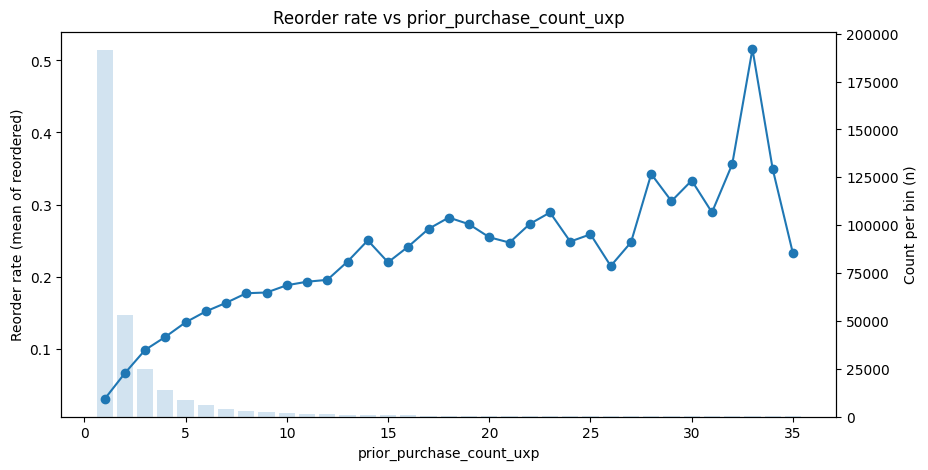

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

col = "prior_purchase_count_uxp"
y = "reorder"

tmp = (
    eda_df
    .groupby(col)[y]
    .agg(rate="mean", n="size")
    .reset_index()
    .sort_values(col)
)

# optional: remove tiny bins so the curve isn't noisy
tmp2 = tmp[tmp["n"] >= 50]

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(tmp2[col], tmp2["rate"], marker="o")
ax1.set_title("Reorder rate vs prior_purchase_count_uxp")
ax1.set_xlabel(col)
ax1.set_ylabel("Reorder rate (mean of reordered)")

# optional: show how much data per bin (counts) on a second axis
ax2 = ax1.twinx()
ax2.bar(tmp2[col], tmp2["n"], alpha=0.2)
ax2.set_ylabel("Count per bin (n)")

plt.show()


In [66]:
eda_df_reorder["prior_purchase_count_uxp"].value_counts()

,count
prior_purchase_count_uxp,
1,5786
2,3499
3,2435
4,1605
5,1200
...,...
62,1
50,1
69,1


# Task-B-Regression

Based on all the previous information and features, the most suitable Target to work on is predicting the number of days until the user's next order (days_until_next_order).

In [ ]:
import pandas as pd

We work on an orders table (which contains the order of user requests and the time between requests)

In [ ]:
orders = datasets["orders"].copy()


In [ ]:
orders = orders.sort_values(["user_id", "order_number"])
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


 The main idea:
days_since_prior_order in the current row = how many days have passed since the "previous order"

 We need a target = how many days until the "next order"
So we get the days_since_prior_order for the next order and put it with the current order

In [ ]:
orders["days_to_next_order"] = orders.groupby("user_id")["days_since_prior_order"].shift(-1)
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_to_next_order
0,2539329,1,prior,1,2,8,NaN,15.0
1,2398795,1,prior,2,3,7,15.0,21.0
2,473747,1,prior,3,3,12,21.0,29.0
3,2254736,1,prior,4,4,7,29.0,28.0
4,431534,1,prior,5,4,15,28.0,19.0
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,30.0
3421079,1854736,206209,prior,11,4,10,30.0,18.0
3421080,626363,206209,prior,12,1,12,18.0,7.0
3421081,2977660,206209,prior,13,1,12,7.0,30.0


 We define the snapshot (the last prior order for each user)

Why? Because my features are built from prior_full (i.e., from the prior date)

So we make the prediction point the last prior order, and the target is the interval for the next order

In [ ]:
prior_snapshot = (orders[orders["eval_set"] == "prior"].groupby("user_id", as_index=False).tail(1)[["user_id", "order_id", "order_number", "days_to_next_order"]])
prior_snapshot

,user_id,order_id,order_number,days_to_next_order
9,1,2550362,10,14.0
24,2,839880,14,30.0
37,3,1402502,12,11.0
43,4,2557754,5,30.0
48,5,157374,4,6.0
...,...,...,...,...
3420932,206205,414137,3,10.0
3421000,206206,1904200,67,0.0
3421017,206207,1005822,16,14.0
3421067,206208,1882108,49,4.0


I merged the snapshot with the user_features we created earlier.

Each row at the end = one user (this is what's required in Task-B).

In [ ]:
task_B_df = prior_snapshot.merge(user_features, on="user_id", how="left")
task_B_df

,user_id,order_id,order_number,days_to_next_order,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap
0,1,2550362,10,14.0,10,5.900000,0.694915,20.259260,30.0
1,2,839880,14,30.0,14,13.928571,0.476923,15.967033,13.0
2,3,1402502,12,11.0,12,7.333333,0.625000,11.487180,15.0
3,4,2557754,5,30.0,5,3.600000,0.055556,15.357142,0.0
4,5,157374,4,6.0,4,9.250000,0.378378,14.500000,19.0
...,...,...,...,...,...,...,...,...,...
206204,206205,414137,3,10.0,3,10.666667,0.250000,20.666666,10.0
206205,206206,1904200,67,0.0,67,4.253731,0.473684,4.042705,11.0
206206,206207,1005822,16,14.0,16,13.937500,0.587444,14.879397,18.0
206207,206208,1882108,49,4.0,49,13.816327,0.707533,7.442105,7.0


We need to make sure I don't have any rows that don't have a target (meaning the user has no request after the prior row)

Because if they exist, I must delete them.

In [ ]:
task_B_df.isna().sum()

,0
user_id,0
order_id,0
order_number,0
days_to_next_order,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0
user_last_interorder_gap,0


## EDA for Regression df

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = task_B_df.copy()


In [ ]:
df.columns

Index(['user_id', 'order_id', 'order_number', 'days_to_next_order',
       'user_total_orders', 'user_average_basket', 'user_reorder_ratio',
       'user_mean_days_between_order', 'user_last_interorder_gap'],
      dtype='object')

In [ ]:
df.shape

(206209, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   user_id                       206209 non-null  int32  
 1   order_id                      206209 non-null  int32  
 2   order_number                  206209 non-null  int16  
 3   days_to_next_order            206209 non-null  float32
 4   user_total_orders             206209 non-null  int16  
 5   user_average_basket           206209 non-null  float64
 6   user_reorder_ratio            206209 non-null  float64
 7   user_mean_days_between_order  206209 non-null  float32
 8   user_last_interorder_gap      206209 non-null  float32
dtypes: float32(3), float64(2), int16(2), int32(2)
memory usage: 7.9 MB


In [ ]:
df.isna().sum()

,0
user_id,0
order_id,0
order_number,0
days_to_next_order,0
user_total_orders,0
user_average_basket,0
user_reorder_ratio,0
user_mean_days_between_order,0
user_last_interorder_gap,0


In [ ]:
df.describe()

,user_id,order_id,order_number,days_to_next_order,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap
count,206209.000000,2.062090e+05,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,1.714464e+06,15.590367,17.061783,15.590367,9.951586,0.432249,15.469670,16.081413
std,59527.555167,9.862824e+05,16.654774,10.672453,16.654774,5.863570,0.212144,7.207112,10.435066
min,1.000000,2.500000e+01,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,51553.000000,8.620630e+05,5.000000,7.000000,5.000000,5.740741,0.267857,9.553798,7.000000
50%,103105.000000,1.713984e+06,9.000000,15.000000,9.000000,8.933333,0.428571,14.692307,14.000000
75%,154657.000000,2.568239e+06,19.000000,30.000000,19.000000,13.000000,0.595745,20.724409,30.000000
max,206209.000000,3.421073e+06,99.000000,30.000000,99.000000,70.250000,0.989529,30.000000,30.000000




---



I want to share some details I've gathered about the drawing below .

If you notice, I was working on the `days_to_next_order` target.

The distribution turned out to be right-skewed, with a mass point at 30, and the distribution wasn't continuous and smooth, which wasn't our goal at all.

Okay, so what effect does this have on Regression?

✅ The most suitable model for it is (Tree / Boosting)

I will prove that with code later. ^-^

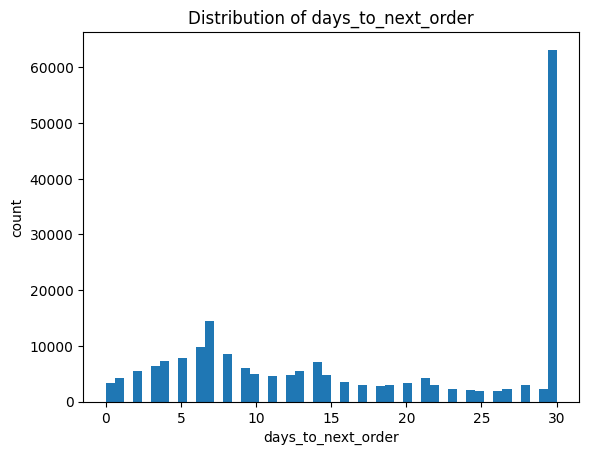

In [ ]:
target = "days_to_next_order"

plt.figure()
plt.hist(df[target], bins=50)
plt.title("Distribution of days_to_next_order")
plt.xlabel("days_to_next_order")
plt.ylabel("count")
plt.show()

What does each part of the boxplot represent?

1️⃣ The orange line (Medium) ≈ 15 days.

2️⃣ Box (Q1 to Q3) Approximately:

    Q1 ≈ 7 days
    Q3 ≈ 30 days
3️⃣ Whiskers

The left side is close to 1 day.
The right side has reached 30 days.
This means:

    There are very active users (who reorder quickly).

    And many users reach the maximum limit (30 days), meaning they order almost
    every month.
4️⃣ There are no “outliers”. Why?

Because:

The value 30 is not a statistical outlier.
It is a frequently occurring value

The IQR is wide due to the distribution itself

Meaning:

    30 is a “normal” value in the data, not an outlier

This confirms what I said earlier.

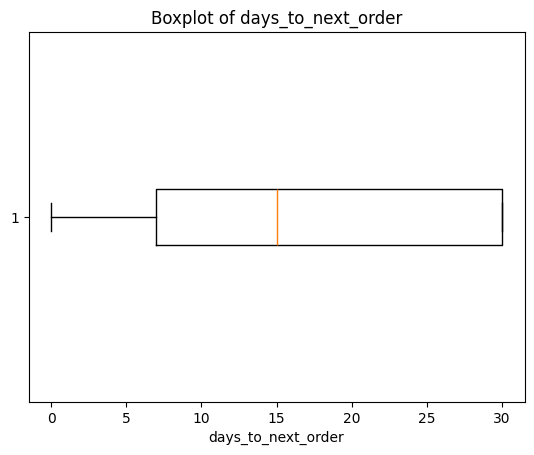

In [ ]:
plt.figure()
plt.boxplot(df[target], vert=False)
plt.title("Boxplot of days_to_next_order")
plt.xlabel("days_to_next_order")
plt.show()

Correlation


---

To calculate the correlation, I first identified the numerical columns and excluded three columns (days_to_next_order , user_id , order_id).

**I have excluded the ID columns because they are not important for correlation, and the days_to_next_order column because it is not a feature, it is a target.


In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).columns.drop(["days_to_next_order","user_id", "order_id"])
corr = df[numeric_cols].corr()
corr

,order_number,user_total_orders,user_average_basket,user_reorder_ratio,user_mean_days_between_order,user_last_interorder_gap
order_number,1.000000,1.000000,0.021919,0.636891,-0.541483,-0.373977
user_total_orders,1.000000,1.000000,0.021919,0.636891,-0.541483,-0.373977
user_average_basket,0.021919,0.021919,1.000000,0.109718,-0.018633,-0.020747
user_reorder_ratio,0.636891,0.636891,0.109718,1.000000,-0.432978,-0.284566
user_mean_days_between_order,-0.541483,-0.541483,-0.018633,-0.432978,1.000000,0.643294
user_last_interorder_gap,-0.373977,-0.373977,-0.020747,-0.284566,0.643294,1.000000


Dark blue -> Strong positive correlation (+1)

Dark red -> Strong negative correlation (−1)

Light colors -> Weak correlation / close to zero.

The correlation analysis reveals strong multicollinearity between order_number and user_total_orders, indicating redundancy. Temporal features show moderate positive correlation, reflecting consistent ordering behavior, while basket size remains largely independent from ordering frequency.

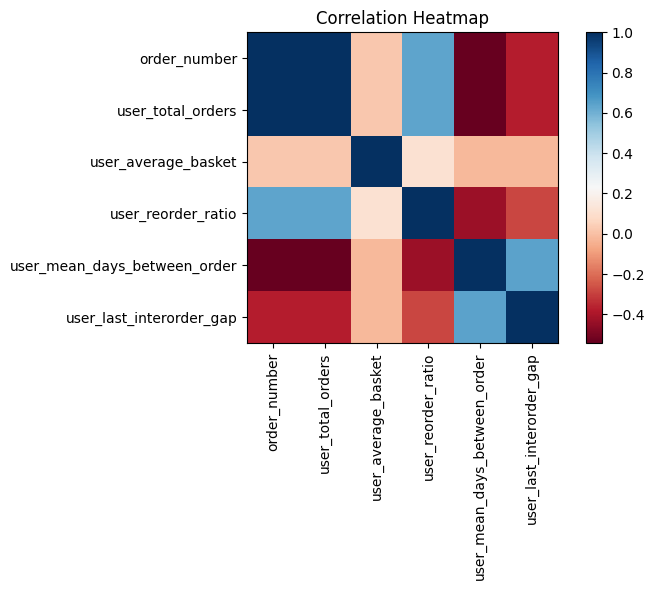

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="RdBu" )
plt.colorbar()
plt.xticks(range(len(numeric_cols)),numeric_cols , rotation=90)
plt.yticks(range(len(numeric_cols)),numeric_cols )
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

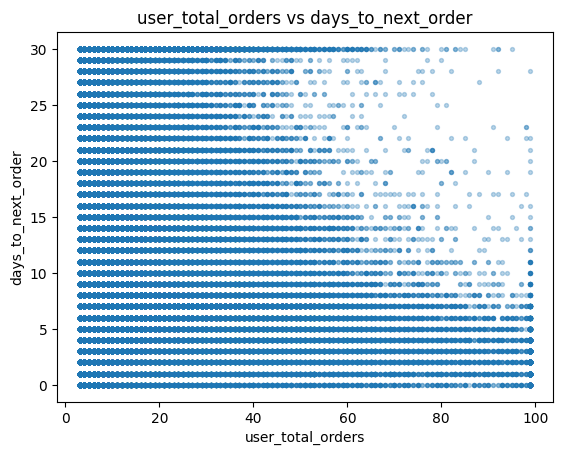

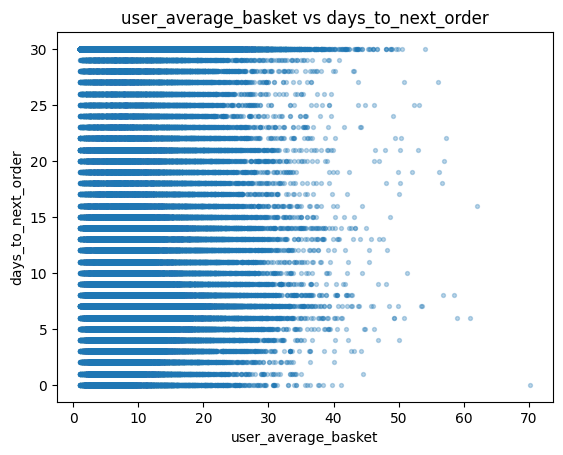

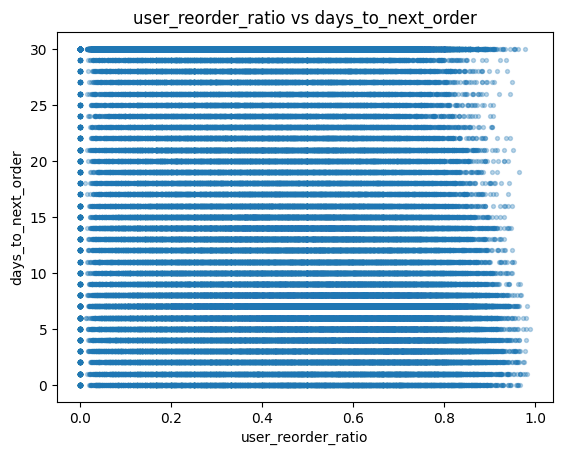

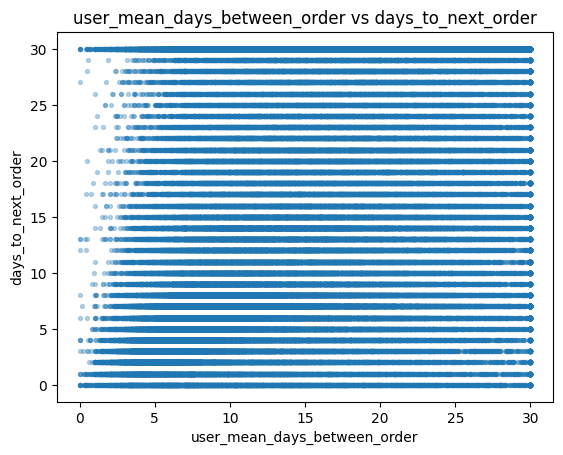

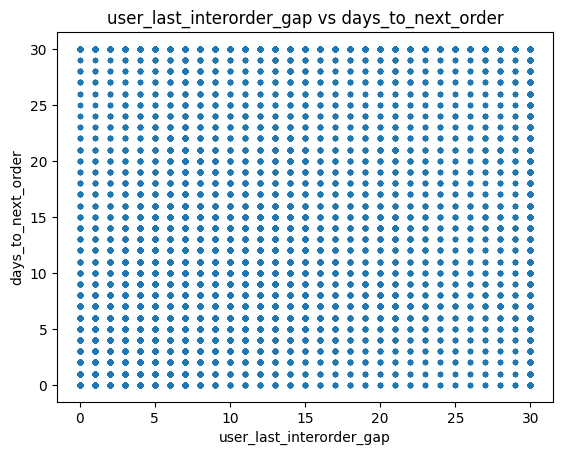

In [ ]:
num_c = [
    c for c in numeric_cols
    if c in df.columns and c != "order_number"
]

for col in num_c:
    plt.figure()
    plt.scatter(df[col], df[target], s=8, alpha=0.3)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

/tmp/ipython-input-2710413448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_target = df.groupby(bins)[target].mean()


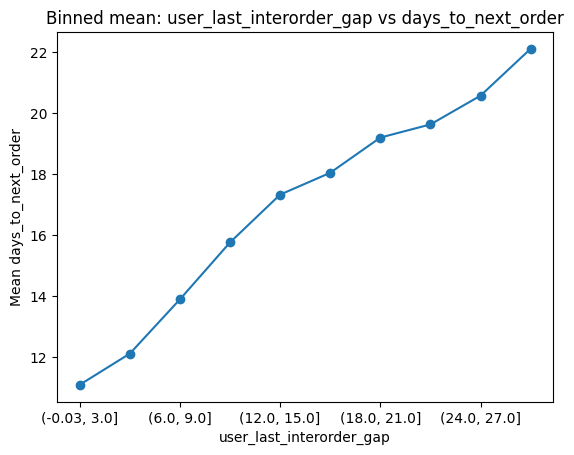

In [ ]:
bins = pd.cut(df[col], bins=10)
mean_target = df.groupby(bins)[target].mean()

plt.figure()
mean_target.plot(marker="o")
plt.title(f"Binned mean: {col} vs {target}")
plt.xlabel(col)
plt.ylabel(f"Mean {target}")
plt.show()